# In this exercise, we will generate a network from GTFS data

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Read relevant files as pandas dataframe
path = r'TransitNet_GTFS/db_gtfs' #change here to read the Deutsche Bahn network(German Rail)
routes = pd.read_csv(path+'/routes.txt')
stops = pd.read_csv(path+'/stops.txt')
stop_times = pd.read_csv(path+'/stop_times.txt')
trips = pd.read_csv(path+'/trips.txt')

In [4]:
# Read relevant files as pandas dataframe
path = r'TransitNet_GTFS/gtfs' #change here to add your path
routes = pd.read_csv(path+'/routes.txt')
stops = pd.read_csv(path+'/stops.txt')
stop_times = pd.read_csv(path+'/stop_times.txt')
trips = pd.read_csv(path+'/trips.txt')

In [5]:
# What is in the stops file?
stops.head()

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,12TH,12th St. Oakland City Center,NaN,37.803768,-122.271450,12TH,http://www.bart.gov/stations/12TH/,0,NaN,NaN,1
1,16TH,16th St. Mission,NaN,37.765062,-122.419694,16TH,http://www.bart.gov/stations/16TH/,0,NaN,NaN,1
2,19TH,19th St. Oakland,NaN,37.808350,-122.268602,19TH,http://www.bart.gov/stations/19TH/,0,NaN,NaN,1
3,24TH,24th St. Mission,NaN,37.752470,-122.418143,24TH,http://www.bart.gov/stations/24TH/,0,NaN,NaN,1
4,ANTC,Antioch,NaN,37.995388,-121.780420,ANTC,http://www.bart.gov/stations/ANTC/,0,NaN,NaN,1


In [6]:
# What is in the routes file?
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,1,BART,Yellow,Antioch - SFO/Millbrae,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,ffff33,NaN
1,3,BART,Orange,Warm Springs/South Fremont - Richmond,NaN,1,http://www.bart.gov/schedules/,ff9933,NaN
2,5,BART,Green,Warm Springs/South Fremont - Daly City,NaN,1,http://www.bart.gov/schedules/,339933,NaN
3,7,BART,Red,Richmond - Daly City/Millbrae,NaN,1,http://www.bart.gov/schedules/,ff0000,NaN
4,9,BART,Blue-Sun,Dublin/Pleasanton - MacArthur,NaN,1,http://www.bart.gov/schedules/,0099cc,NaN


In [7]:
# What is in the trips file?
trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,1,WKDY,3610458WKDY,San Francisco International Airport,0,NaN,01_shp,1,1
1,1,SAT,3730600SAT,Millbrae,0,NaN,01_shp,1,1
2,1,SUN,3610758SUN,San Francisco International Airport,0,NaN,01_shp,1,1
3,1,WKDY,3630503WKDY,San Francisco International Airport,0,NaN,01_shp,1,1
4,1,SAT,3750558SAT,Millbrae,0,NaN,01_shp,1,1


In [8]:
# What is in the stop_times file?
stop_times.head(20)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,3610758SUN,07:58:00,07:58:00,LAFY,1,San Francisco International Airport,NaN,NaN,NaN,1
1,3610758SUN,08:03:00,08:03:00,ORIN,2,San Francisco International Airport,NaN,NaN,NaN,1
2,3610758SUN,08:09:00,08:09:00,ROCK,3,San Francisco International Airport,NaN,NaN,NaN,1
3,3610758SUN,08:13:00,08:13:00,MCAR,4,San Francisco International Airport,NaN,NaN,NaN,1
4,3610758SUN,08:16:00,08:16:00,19TH,5,San Francisco International Airport,NaN,NaN,NaN,1
5,3610758SUN,08:18:00,08:18:00,12TH,6,San Francisco International Airport,NaN,NaN,NaN,1
6,3610758SUN,08:23:00,08:23:00,WOAK,7,San Francisco International Airport,NaN,NaN,NaN,1
7,3610758SUN,08:29:00,08:29:00,EMBR,8,San Francisco International Airport,NaN,NaN,NaN,1
8,3610758SUN,08:31:00,08:31:00,MONT,9,San Francisco International Airport,NaN,NaN,NaN,1
9,3610758SUN,08:33:00,08:33:00,POWL,10,San Francisco International Airport,NaN,NaN,NaN,1


## We create the network in three steps: adding nodes, adding node coordinates, adding edges.

In [9]:
# create an empty undirected graph
G = nx.Graph()
# find the list that contains all the stops
stops['stop_id'].head(20)

0     12TH
1     16TH
2     19TH
3     24TH
4     ANTC
5     ASHB
6     BALB
7     BAYF
8     CAST
9     CIVC
10    COLS
11    COLM
12    CONC
13    DALY
14    DBRK
15    DUBL
16    DELN
17    PLZA
18    EMBR
19    FRMT
Name: stop_id, dtype: object

In [10]:
# add nodes
G.add_nodes_from(stops['stop_id'])

In [11]:
# create dictionaries of node coordinates and labels
pos = dict(G.nodes)
labels = dict(G.nodes)

for stop in pos:
    lon = float(stops[stops['stop_id'] == stop]['stop_lon'])
    lat = float(stops[stops['stop_id'] == stop]['stop_lat'])
    pos[stop] = (lon,lat)
    name = stops[stops['stop_id']==stop].stop_name.values[0]
    labels[stop] = str(name)

In [12]:
# add links
# What we want: a list of edge, in the form of tuples
# For example, something like edge_list = [(stop_A,stop_B),(stop_B,stop_C)]
# then we can do: G.add_edges_from(edge_list)

In [13]:
# For each route, pick one trip and the corresponding stop lists
route_ids = routes['route_id']
edge_list = {}

for route_id in route_ids:
    trip_ids = trips[trips.route_id == route_id]['trip_id']
    for trip_id in trip_ids:
    # extract the stop lists for each trip id from stop_times
        stop_list = list(stop_times[stop_times.trip_id == trip_id]['stop_id'])

        # for each list, generate the pairs of edges and append them to edge_list
        for i in range(0,len(stop_list)-1):
            edge_tuple = (stop_list[i],stop_list[i+1])

            if edge_tuple not in edge_list:
                edge_list[edge_tuple] = 1
            else: edge_list[edge_tuple] +=1

In [14]:
#add weights
edge_list_weighted =[]
for edge in edge_list:
    edge_list_weighted.append((edge[0],edge[1],edge_list[edge]))

In [15]:
G.add_weighted_edges_from(edge_list_weighted)

In [16]:
# Add some color for flow
colors = ['red' if G[u][v]['weight']>50 else 'green' for u,v in G.edges]
widths = [8.0 if G[u][v]['weight']>50 else 2.0 for u,v in G.edges]

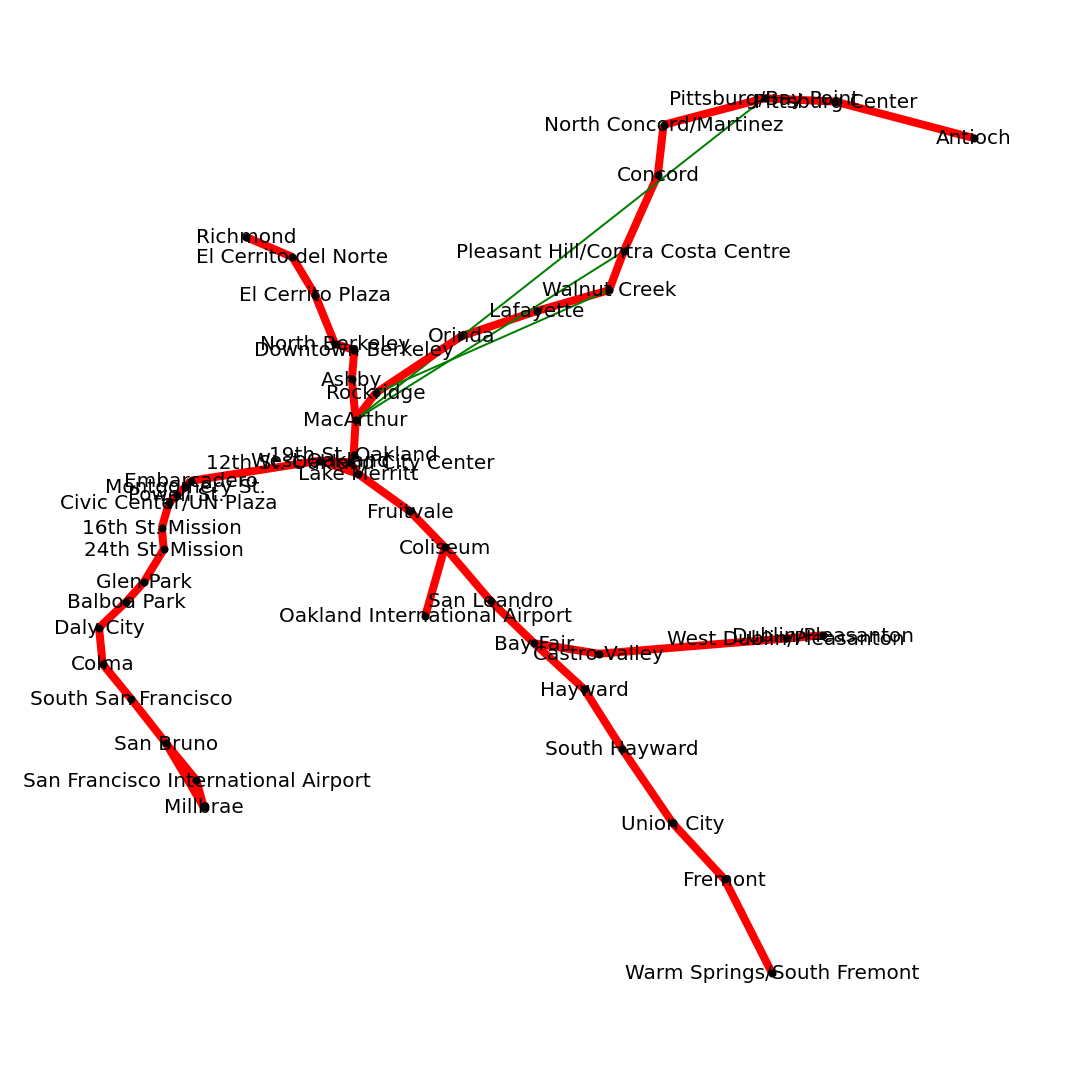

In [17]:
fig = plt.figure(figsize=(15,15))
nx.draw_networkx(G,pos = pos,font_size =20,labels=labels,edge_color = colors,width=widths,with_labels=True, node_size = 50,node_color = 'black')
plt.axis('off')
plt.tight_layout()
plt.savefig("Graph.png", format="PNG")
plt.show()


## Let's find the maximun of the shortest path lengths

In [18]:
## First we check that we 
comps = sorted(nx.connected_components(G),key = len, reverse=True)
len(comps)

1

In [19]:
#we could use this code to extract the largest connected components
#nodes_gc=comps[0]
#Gc = nx.subgraph(g,nodes_gc)

In [20]:
lengths = nx.shortest_path_length(G)
st_length = {}  #this will saves the maximun path per station
ml=0
for key in lengths:   #iterates in all the lengths per station 
   ll = key     #only gives an intuitive name
   i = max(ll[1].values())  #finds the maximun value of length    
   st_length[ll[0]] = i  #ll[0] has the name of the station and and i the value 
   if i > ml:
      ml = i  #this will save the overall maximun
   print("For ", ll[0]," max length is ",i) 

print("The maximun length in the network is ",ml)

For  12TH  max length is  14
For  16TH  max length is  15
For  19TH  max length is  15
For  24TH  max length is  16
For  ANTC  max length is  19
For  ASHB  max length is  17
For  BALB  max length is  18
For  BAYF  max length is  18
For  CAST  max length is  19
For  CIVC  max length is  14
For  COLS  max length is  16
For  COLM  max length is  20
For  CONC  max length is  18
For  DALY  max length is  19
For  DBRK  max length is  18
For  DUBL  max length is  21
For  DELN  max length is  21
For  PLZA  max length is  20
For  EMBR  max length is  12
For  FRMT  max length is  22
For  FTVL  max length is  15
For  GLEN  max length is  17
For  HAYW  max length is  19
For  LAFY  max length is  19
For  LAKE  max length is  14
For  MCAR  max length is  16
For  MLBR  max length is  23
For  MONT  max length is  12
For  NBRK  max length is  19
For  NCON  max length is  18
For  OAKL  max length is  17
For  ORIN  max length is  18
For  PITT  max length is  17
For  PCTR  max length is  18
For  PHIL  max

In [21]:
for key in st_length:  #iterates all lengths of each node
    if st_length[key] == ml: #if it equals to the maximun
        print(key)   #prints the name of the station
        p = nx.shortest_path(G,key)  #calculates all shorthest path from that station
        for k in p:   #iterates all the paths
            if nx.shortest_path_length(G,key,k)==ml: #finds the path that has a length 
                                                   #equal to the maximum   
                print(p[k])   # writes the path

MLBR
['MLBR', 'SBRN', 'SSAN', 'COLM', 'DALY', 'BALB', 'GLEN', '24TH', '16TH', 'CIVC', 'POWL', 'MONT', 'EMBR', 'WOAK', 'LAKE', 'FTVL', 'COLS', 'SANL', 'BAYF', 'HAYW', 'SHAY', 'UCTY', 'FRMT', 'WARM']
SFIA
['SFIA', 'SBRN', 'SSAN', 'COLM', 'DALY', 'BALB', 'GLEN', '24TH', '16TH', 'CIVC', 'POWL', 'MONT', 'EMBR', 'WOAK', 'LAKE', 'FTVL', 'COLS', 'SANL', 'BAYF', 'HAYW', 'SHAY', 'UCTY', 'FRMT', 'WARM']
WARM
['WARM', 'FRMT', 'UCTY', 'SHAY', 'HAYW', 'BAYF', 'SANL', 'COLS', 'FTVL', 'LAKE', 'WOAK', 'EMBR', 'MONT', 'POWL', 'CIVC', '16TH', '24TH', 'GLEN', 'BALB', 'DALY', 'COLM', 'SSAN', 'SBRN', 'SFIA']
['WARM', 'FRMT', 'UCTY', 'SHAY', 'HAYW', 'BAYF', 'SANL', 'COLS', 'FTVL', 'LAKE', 'WOAK', 'EMBR', 'MONT', 'POWL', 'CIVC', '16TH', '24TH', 'GLEN', 'BALB', 'DALY', 'COLM', 'SSAN', 'SBRN', 'MLBR']


In [22]:
lengths = nx.shortest_path_length(G)
plengths=[]
for key in lengths:   #iterates all the lengths
   ll = key
   for i in list(ll[1].values()):    #saves a list with the lengths greater than zero
      if i > 0:plengths.append(i)

In [23]:
len(plengths)

2256

### Number of Path Lengths

#Write the nuber of path lenths as the combination of number of nodes

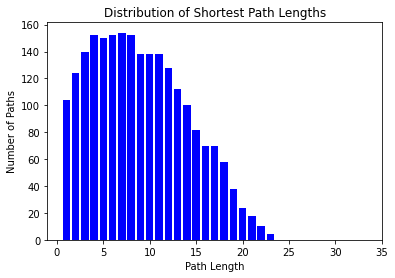

In [24]:
hist4, bins4 = np.histogram(plengths, bins = range(1,35))

plt.bar(bins4[:-1], hist4, align = 'center', color = 'b')

plt.xlabel("Path Length")
plt.ylabel("Number of Paths")
plt.title("Distribution of Shortest Path Lengths")
plt.show()

In [25]:
G.number_of_nodes()

48

In [26]:
(48.0*47.0)

2256.0

In [27]:
nx.average_shortest_path_length(G)

9.0177304964539

In [28]:
Gs = nx.path_graph(6)

In [29]:
center_nodes = {0, 3}

In [30]:
cells = nx.voronoi_cells(Gs, center_nodes)

In [31]:
partition = set(map(frozenset, cells.values()))

In [32]:
sorted(map(sorted, partition))

[[0, 1], [2, 3, 4, 5]]